In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
url = "https://raw.githubusercontent.com/julianfrhn/TA/main/DATASET%20RESTORAN%20(2).csv"
df0 = pd.read_csv(url)
df0

,No,Resto,Lokasi,Nama Reviewer,Gender,Rating,Review
0,1,Bakmie yamin noni,Komplek bojong malaka indah Blok G 8 No.67,MV D,L,4,Best yamin .. enak mie ny kenyal basonya jg ma...
1,2,NaN,NaN,Maudy Pavita,P,5,Sambel yamin nya asli pedo! Deket rumah harga ...
2,3,NaN,NaN,Olivia V Dhubyan,P,4,"Enak, pengiriman cepat! Yang masaknya ganteng...."
3,4,NaN,NaN,Ananda T Maharani,P,3,Bakmie nya enak banget!!! Apalagi pangsitnya!!
4,5,NaN,NaN,Putra Dhubyan,L,5,enak banget!
...,...,...,...,...,...,...,...
295,296,bakmie jogloe,jl. Tubagus ismail,dama wanto,L,1,pelayanan nya lama banget
296,297,NaN,NaN,Misno,P,2,B aja banget
297,298,NaN,NaN,yudi setiawan,L,1,gak enak
298,299,NaN,NaN,syarif hidayat,L,2,Bad dish


In [6]:
df = df0

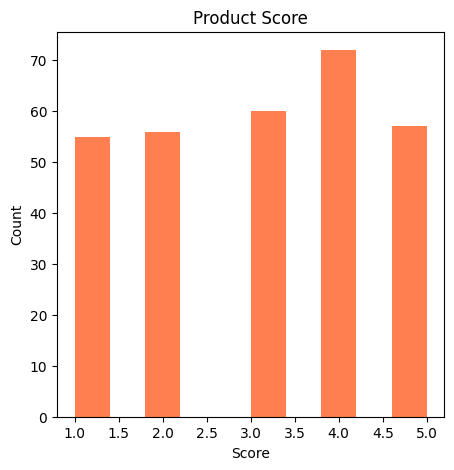

In [7]:
#step2-Data Analysis

# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

# Product Scores
df['Rating'].plot(kind='hist', figsize=(5, 5), color='coral')

plt.title('Product Score') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Score') # add x-label

plt.show()
#fig = px.histogram(df, x="Score")
#fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',marker_line_width=1.5)
#fig.update_layout(title_text='Product Score')
#fig.show()

In [8]:
#wordcloud

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


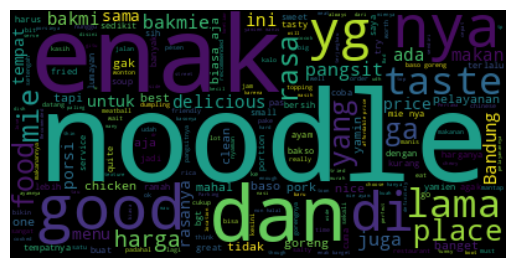

In [9]:
# Create stopword list:

stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(Review for Review in df.Review)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [10]:
#Step 3: Classifying Tweets
 #assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df = df[df['Rating'] != 3]
df['sentiment'] = df['Rating'].apply(lambda rating : +1 if rating > 3 else -1)

<ipython-input-10-8caacd3909dc>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



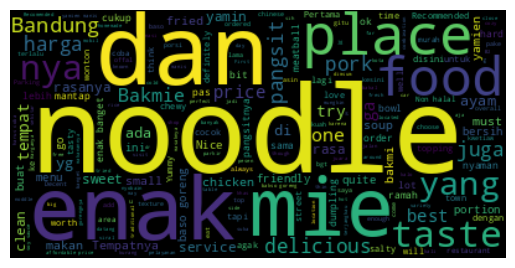

In [11]:
#Step 4: More Data Analysis
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

#Wordcloud — Positive Sentiment
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"])
# good and great removed because they were included in negative sentiment
pos = " ".join(Review for Review in positive.Review)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

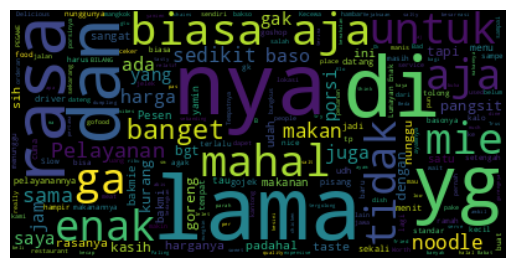

In [12]:
#Wordcloud — Negative Sentiment
neg = " ".join(Review for Review in negative.Review)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

<ipython-input-13-8de608de4e94>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-13-8de608de4e94>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



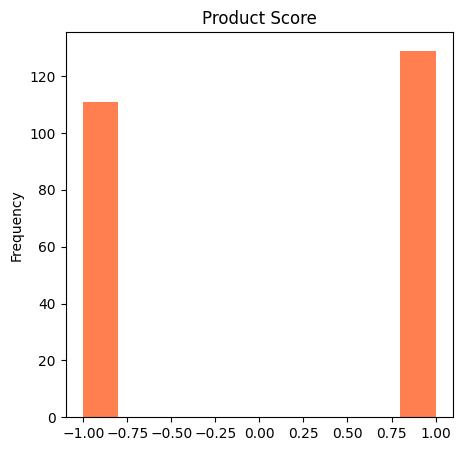

In [13]:
#product sentiment
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentiment'].replace({1 : 'positive'})

#df['sentimentt'].plot(kind='hist', figsize=(5, 5), color='coral')
df['sentiment'].plot(kind='hist', figsize=(5, 5), color='coral')

plt.title('Product Score') # add a title to the histogram
#plt.ylabel('Count') # add y-label
#plt.xlabel('Sentiment') # add x-label

plt.show()

#fig = px.histogram(df, x="sentimentt")
#fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',marker_line_width=1.5)
#fig.update_layout(title_text='Product Sentiment')
#fig.show()

In [14]:
#Step 5: Building the Model

#Data Cleaning
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Review'] = df['Review'].apply(remove_punctuation)
df = df.dropna(subset=['Review'])
df['Review'] = df['Review'].apply(remove_punctuation)

#split dataframe
dfNew = df[['Rating','Review','sentiment']]
dfNew.head()

<ipython-input-14-3031ce7bf4e9>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Rating,Review,sentiment
0,4,Best yamin enak mie ny kenyal basonya jg mantap,1
1,5,Sambel yamin nya asli pedo Deket rumah harga c...,1
2,4,"Enak, pengiriman cepat Yang masaknya ganteng w...",1
4,5,enak banget,1
6,4,"Good, Delicious",1


In [15]:
# random split train and test data
# random split train and test data
X = dfNew.Review
y = dfNew.sentiment
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Create a bag of words

# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(X_train)
test_matrix = vectorizer.transform(X_test)

Random Forest

In [17]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [18]:
#Split target and independent variables

X_train = train_matrix
X_test = test_matrix
#y_train = train['sentiment']
#y_test = test['sentiment']

In [19]:
# fit model on data
rf.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
predictions = rf.predict(X_test)

In [21]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[16,  5],
       [10, 17]])

In [22]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.62      0.76      0.68        21
           1       0.77      0.63      0.69        27

    accuracy                           0.69        48
   macro avg       0.69      0.70      0.69        48
weighted avg       0.70      0.69      0.69        48



Logistic Regression

In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [24]:
#Split target and independent variables

X_train = train_matrix
X_test = test_matrix
#y_train = train['sentiment']
#y_test = test['sentiment']

In [25]:
# Fit model on data

lr.fit(X_train,y_train)

LogisticRegression()

In [26]:
predictions = lr.predict(X_test)

In [27]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[17,  8],
       [ 9, 14]])

In [28]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.65      0.68      0.67        25
           1       0.64      0.61      0.62        23

    accuracy                           0.65        48
   macro avg       0.65      0.64      0.64        48
weighted avg       0.65      0.65      0.65        48



SVM

In [29]:
#Naive Bayes
from sklearn.svm import SVC
svm = SVC()

In [30]:
#Split target and independent variables
X_train = train_matrix
X_test = test_matrix
#y_train = train['sentiment']
#y_test = test['sentiment']

In [31]:
# Fit model on data

svm.fit(X_train,y_train)

SVC()

In [32]:
predictions = svm.predict(X_test)

In [33]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[17,  7],
       [ 9, 15]])

In [34]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.65      0.71      0.68        24
           1       0.68      0.62      0.65        24

    accuracy                           0.67        48
   macro avg       0.67      0.67      0.67        48
weighted avg       0.67      0.67      0.67        48



Naive Bayes

In [35]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [36]:
#Split target and independent variables

X_train = train_matrix
X_test = test_matrix
#y_train = train['sentiment']
#y_test = test['sentiment']

In [37]:
# Fit model on data

nb.fit(X_train.toarray(),y_train)

GaussianNB()

In [38]:
predictions = nb.predict(X_test.toarray())

In [39]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[16,  3],
       [10, 19]])

In [40]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.62      0.84      0.71        19
           1       0.86      0.66      0.75        29

    accuracy                           0.73        48
   macro avg       0.74      0.75      0.73        48
weighted avg       0.77      0.73      0.73        48

